<h2>Introduction</h2>
<br>

Breast cancer (BC) is one of the most common cancers among women worldwide, representing the majority of new cancer cases and cancer-related deaths according to global statistics, making it a significant public health problem in today’s society.
The early diagnosis of BC can improve the prognosis and chance of survival significantly, as it can promote timely clinical treatment to patients. Further accurate classification of benign tumors can prevent patients undergoing unnecessary treatments. Thus, the correct diagnosis of BC and classification of patients into malignant or benign groups is the subject of much research.

# <h4>Data Set Information:

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. 
They describe characteristics of the cell nuclei present in the image.


Attribute Information:

1. diagnosis: The diagnosis of breast tissues (1 = malignant, 0 = benign)
2. mean_radius: mean of distances from center to points on the perimeter
3. mean_texture: standard deviation of gray-scale values
4. mean_perimeter: mean size of the core tumor
5. mean_area
6. mean_smoothness: mean of local variation in radius lengths

# Exploring the Dataset

In [3]:
import pandas as pd
data = pd.read_csv('Breast_cancer_data.csv')

In [6]:
data.head(20)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
5,12.45,15.70,82.57,477.1,0.12780,0
6,18.25,19.98,119.60,1040.0,0.09463,0
7,13.71,20.83,90.20,577.9,0.11890,0
8,13.00,21.82,87.50,519.8,0.12730,0
9,12.46,24.04,83.97,475.9,0.11860,0


In [8]:
data.shape

(569, 6)

In [10]:
data.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
mean_radius        569 non-null float64
mean_texture       569 non-null float64
mean_perimeter     569 non-null float64
mean_area          569 non-null float64
mean_smoothness    569 non-null float64
diagnosis          569 non-null int64
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [17]:
data.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

# UNIVARIATE ANALYSIS

#Target variable/ class
The main motive of our predictor is to correctly predict on the basis of the data available, if the breast cancer is

Malignant(1) i.e. Harmful ,or
Benign(0) i.e. Not Harmful.
Hence, our target class is Diagnosis

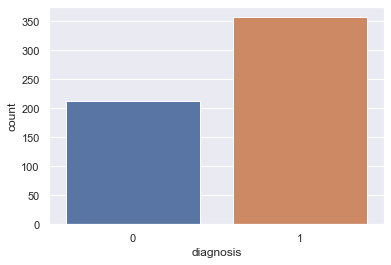

In [20]:
import seaborn as sns
sns.set(style="darkgrid")

ax = sns.countplot(x='diagnosis',data=data)

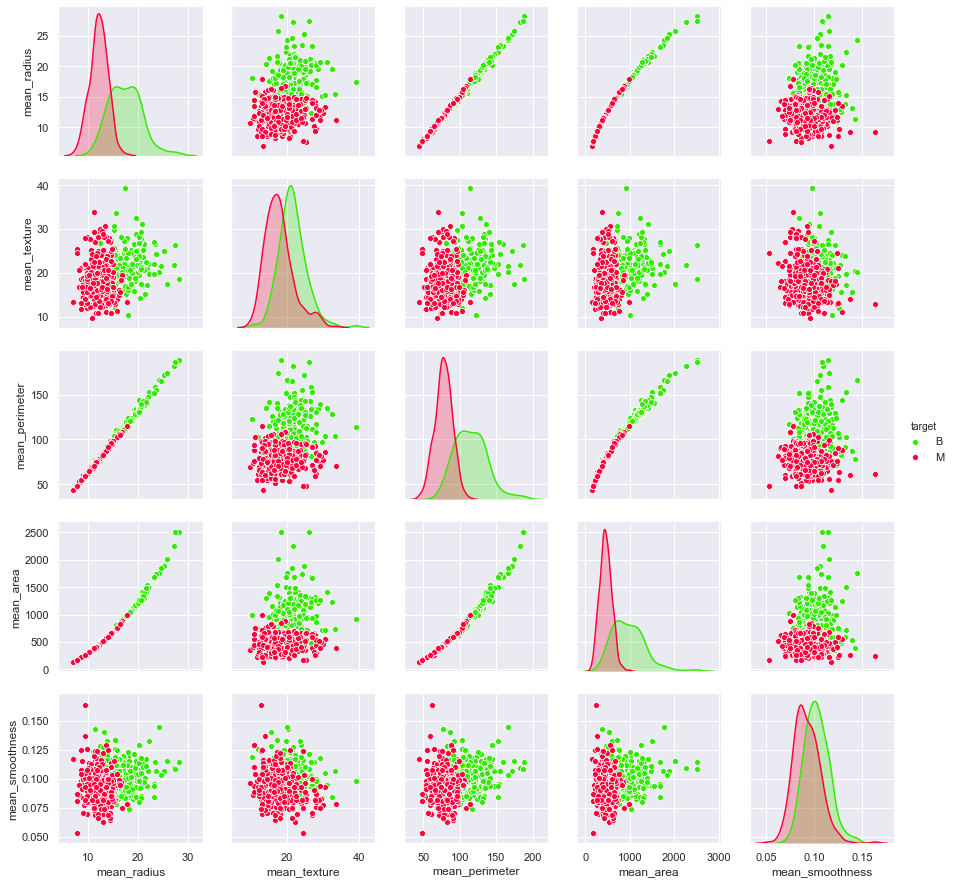

In [28]:
data['target'] = data['diagnosis'].map({0:'B',1:'M'}) # converting the data into categorical

g = sns.pairplot(data.drop('diagnosis', axis = 1), hue="target", palette='prism');


 The features mean_perimeter and mean_texture seem to be most relevant



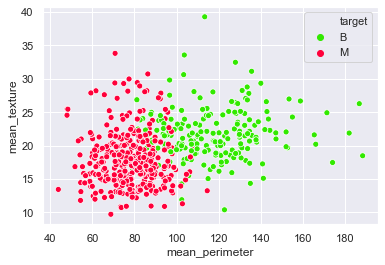

In [31]:
sns.scatterplot(x='mean_perimeter', y = 'mean_texture', data = data, hue = 'target', palette='prism');


In [32]:
features = ['mean_perimeter', 'mean_texture']
X_feature = data[features]

In [33]:
y_target = data['diagnosis']


# Splitting the dataset

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X_feature, y_target, test_size=0.3, random_state = 42)


In [37]:
X_train.shape

(398, 2)

In [38]:
X_test.shape

(171, 2)

# Fitting and Evaluating model

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)


F:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
import sys
!{sys.executable} -m pip install mlxtend

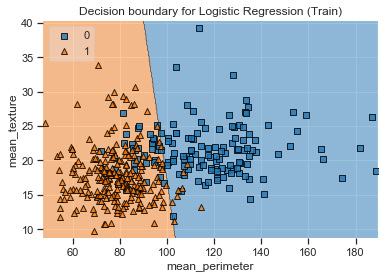

In [41]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2)
plt.title("Decision boundary for Logistic Regression (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");


In [42]:
y_pred = model.predict(X_test)


In [43]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using Logistic Regression:", acc*100)


Accuracy score using Logistic Regression: 92.98245614035088


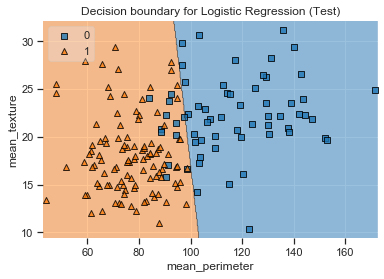

In [47]:
plot_decision_regions(X_test.values, y_test.values, clf=model, legend=2)
plt.title("Decision boundary for Logistic Regression (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");


In [45]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_mat


array([[ 51,  12],
       [  0, 108]], dtype=int64)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
y_pred = clf.predict(X_test)


In [50]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)


Accuracy score using KNN: 92.39766081871345


In [51]:
confusion_matrix(y_test, y_pred)


array([[ 56,   7],
       [  6, 102]], dtype=int64)

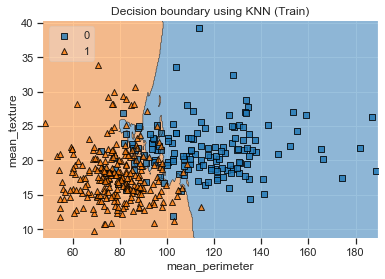

In [52]:
plot_decision_regions(X_train.values, y_train.values, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");


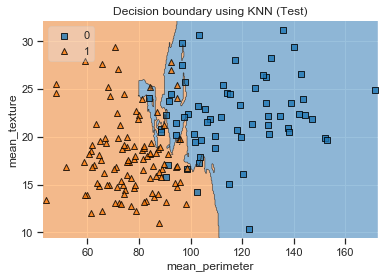

In [53]:
plot_decision_regions(X_test.values, y_test.values, clf=clf, legend=2)
plt.title("Decision boundary using KNN (Test)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");


In [71]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [72]:
y_pred = classifier.predict(X_test)

In [73]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using SVC:", acc*100)


Accuracy score using SVC: 91.22807017543859


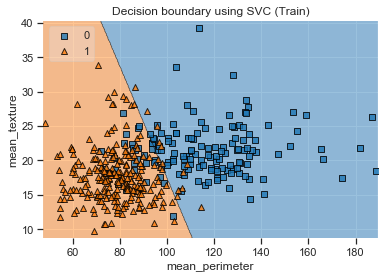

In [59]:
plot_decision_regions(X_train.values, y_train.values, clf=classifier, legend=2)
plt.title("Decision boundary using SVC (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");


In [60]:
confusion_matrix(y_test, y_pred)


array([[ 52,  11],
       [  4, 104]], dtype=int64)

In [62]:
from sklearn.tree import DecisionTreeClassifier
d_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
d_classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [65]:
y_pred=d_classifier.predict(X_test)

In [66]:
confusion_matrix(y_test, y_pred)


array([[54,  9],
       [14, 94]], dtype=int64)

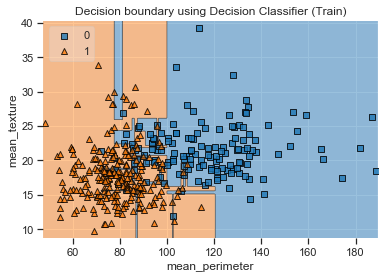

In [68]:
plot_decision_regions(X_train.values, y_train.values, clf=d_classifier, legend=2)
plt.title("Decision boundary using Decision Classifier (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");


In [70]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using KNN:", acc*100)


Accuracy score using KNN: 86.54970760233918


In [75]:
from sklearn.ensemble import RandomForestClassifier
r_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
r_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [76]:
y_pred=r_classifier.predict(X_test)

In [77]:
confusion_matrix(y_test, y_pred)


array([[56,  7],
       [11, 97]], dtype=int64)

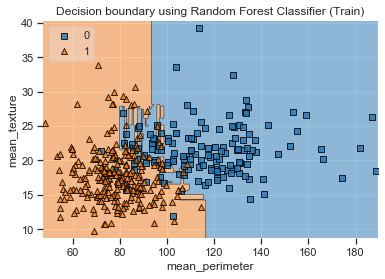

In [78]:
plot_decision_regions(X_train.values, y_train.values, clf=r_classifier, legend=2)
plt.title("Decision boundary using Random Forest Classifier (Train)")
plt.xlabel("mean_perimeter")
plt.ylabel("mean_texture");


In [80]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy score using RF:", acc*100)


Accuracy score using RF: 89.47368421052632


After applying the different classification models, we have got below accuracies with different models:
1. Logistic Regression — 92%
2. Nearest Neighbor — 92%
3. Support Vector Machines — 91.2%
4. Decision Tree Algorithm — 86.54%
5. Random Forest Classification — 89.47%
So finally we have built our classification model and we can see that Logistic and KNN and SVC Classification algorithm gives the best results for our dataset. 
Well its not always applicable to every dataset. To choose our model we always need to analyze our dataset and then apply our machine learning model.
This is a basic application of Machine Learning Model to any dataset.As one of the Issues in Decision Tree include handling numeric data other models are best.